In [251]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
yearly_2020_qb = yearly_2020[yearly_2020['Pos'] == 'QB']
yearly_2020_wr = yearly_2020[yearly_2020['Pos'] == 'WR']
yearly_2020_rb = yearly_2020[yearly_2020['Pos'] == 'RB']
yearly_2020_te = yearly_2020[yearly_2020['Pos'] == 'TE']


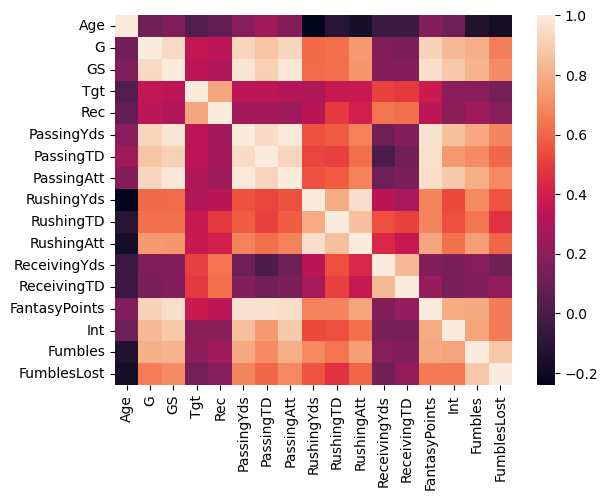

In [45]:
ax = sns.heatmap(yearly_2020_qb.corr())

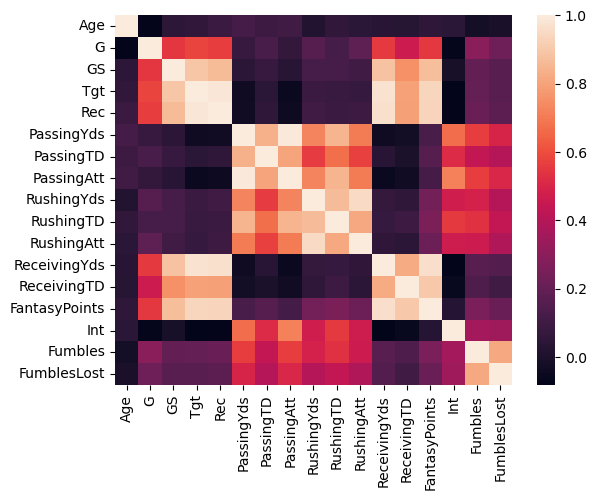

In [46]:
ax = sns.heatmap(yearly_2020_wr.corr())

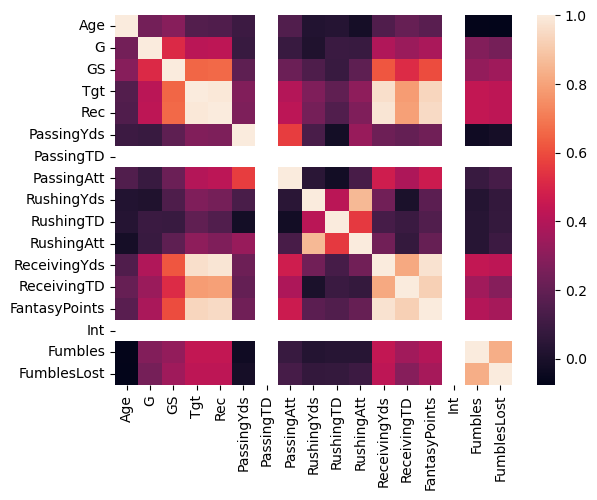

In [47]:
ax = sns.heatmap(yearly_2020_te.corr())

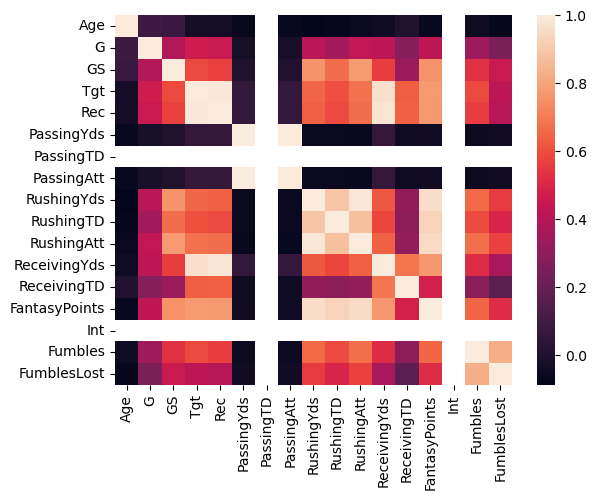

In [48]:
ax = sns.heatmap(yearly_2020_rb.corr())

In [252]:
all_data = pd.DataFrame()
#for i in range(0,10):
    #current_year = pd.read_csv('yearly/200'+str(i)+'.csv')
    #current_year['year'] = (2000 + i)
    #all_data = pd.concat([all_data, current_year])
for i in range(17,22):
    current_year = pd.read_csv('yearly/20'+str(i)+'.csv')
    current_year['year'] = (2000 + i)
    all_data = pd.concat([all_data,current_year])
    

In [253]:
all_data

,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,...,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost,year
0,0.0,Todd Gurley,LAR,RB,23.0,15.0,15.0,87.0,64.0,0.0,...,1305.0,13.0,279.0,788.0,6.0,383.3,0.0,5.0,2.0,2017
1,1.0,Le'Veon Bell,PIT,RB,25.0,15.0,15.0,106.0,85.0,0.0,...,1291.0,9.0,321.0,655.0,2.0,341.6,0.0,3.0,2.0,2017
2,2.0,Kareem Hunt,KAN,RB,22.0,16.0,16.0,63.0,53.0,0.0,...,1327.0,8.0,272.0,455.0,3.0,295.2,0.0,1.0,1.0,2017
3,3.0,Alvin Kamara,NOR,RB,22.0,16.0,3.0,100.0,81.0,0.0,...,728.0,8.0,120.0,826.0,5.0,312.4,0.0,1.0,1.0,2017
4,4.0,Melvin Gordon,LAC,RB,24.0,16.0,16.0,83.0,58.0,0.0,...,1105.0,8.0,284.0,476.0,4.0,288.1,0.0,1.0,0.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,666.0,Travis Benjamin,SFO,NaN,32.0,10.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,1.0,1.0,2021
667,667.0,Trenton Cannon,2TM,RB,27.0,12.0,0.0,0.0,0.0,0.0,...,4.0,0.0,3.0,0.0,0.0,-2.0,0.0,1.0,1.0,2021
668,668.0,John Wolford,LAR,QB,26.0,3.0,0.0,0.0,0.0,5.0,...,-1.0,0.0,2.0,0.0,0.0,-2.0,1.0,0.0,0.0,2021
669,669.0,Josh Rosen,ATL,QB,24.0,4.0,0.0,0.0,0.0,19.0,...,0.0,0.0,0.0,0.0,0.0,-3.0,2.0,0.0,0.0,2021


In [254]:
all_data = all_data.dropna()

In [255]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import EarlyStopping

In [256]:
columns_qb = ['Age','G','GS','PassingYds','PassingTD','PassingAtt','RushingYds','RushingTD','RushingAtt','Int','Fumbles','FumblesLost','FantasyPoints','year']
columns_wrte = ['Age','G','GS','Tgt','Rec','ReceivingYds','ReceivingTD','Fumbles','FumblesLost','FantasyPoints','year']
columns_rb = ['Age','G','GS','Tgt','Rec','ReceivingYds','ReceivingTD','RushingTD','RushingAtt','RushingYds','Fumbles','FumblesLost','FantasyPoints','year']
qb_data = all_data[all_data['Pos']=='QB']
qb_data = qb_data[columns_qb]
wrte_data = all_data[(all_data['Pos'].isin(['TE','RB']))]
wrte_data = wrte_data[columns_wrte]
rb_data = all_data[all_data['Pos']=='RB']
rb_data = rb_data[columns_rb]

In [257]:
wrte_data.head()

,Age,G,GS,Tgt,Rec,ReceivingYds,ReceivingTD,Fumbles,FumblesLost,FantasyPoints,year
0,23.0,15.0,15.0,87.0,64.0,788.0,6.0,5.0,2.0,383.3,2017
1,25.0,15.0,15.0,106.0,85.0,655.0,2.0,3.0,2.0,341.6,2017
2,22.0,16.0,16.0,63.0,53.0,455.0,3.0,1.0,1.0,295.2,2017
3,22.0,16.0,3.0,100.0,81.0,826.0,5.0,1.0,1.0,312.4,2017
4,24.0,16.0,16.0,83.0,58.0,476.0,4.0,1.0,0.0,288.1,2017


In [258]:
qb_X = qb_data.drop(['FantasyPoints'],axis=1)
qb_y = qb_data['FantasyPoints']
wrte_X = wrte_data.drop(['FantasyPoints'],axis=1)
wrte_y = wrte_data['FantasyPoints']
rb_X = rb_data.drop(['FantasyPoints'],axis=1)
rb_y = rb_data['FantasyPoints']


In [259]:
train_size_qb = int(len(qb_X) * 0.7)
valid_size_qb = int(len(qb_X) * 0.2)
test_size_qb = len(qb_X) - train_size_qb - valid_size_qb
qb_X_train, qb_X_valid, qb_X_test = qb_X[:train_size_qb], qb_X[train_size_qb:train_size_qb+valid_size_qb], qb_X[-test_size_qb:]
qb_y_train, qb_y_valid, qb_y_test = qb_y[:train_size_qb], qb_y[train_size_qb:train_size_qb+valid_size_qb], qb_y[-test_size_qb:]

train_size_wrte = int(len(wrte_X) * 0.7)
valid_size_wrte = int(len(wrte_X) * 0.2)
test_size_wrte = len(wrte_X) - train_size_wrte - valid_size_wrte
wrte_X_train, wrte_X_valid, wrte_X_test = wrte_X[:train_size_wrte], wrte_X[train_size_wrte:train_size_wrte+valid_size_wrte], wrte_X[-test_size_wrte:]
wrte_y_train, wrte_y_valid, wrte_y_test = wrte_y[:train_size_wrte], wrte_y[train_size_wrte:train_size_wrte+valid_size_wrte], wrte_y[-test_size_wrte:]

train_size_rb = int(len(rb_X) * 0.7)
valid_size_rb = int(len(rb_X) * 0.2)
test_size_rb = len(rb_X) - train_size_rb - valid_size_rb
rb_X_train, rb_X_valid, rb_X_test = rb_X[:train_size_rb], rb_X[train_size_rb:train_size_rb+valid_size_rb], rb_X[-test_size_rb:]
rb_y_train, rb_y_valid, rb_y_test = rb_y[:train_size_rb], rb_y[train_size_rb:train_size_rb+valid_size_rb], rb_y[-test_size_rb:]

In [260]:
from sklearn.preprocessing import StandardScaler

In [261]:
scaler = StandardScaler()
qb_X_train = scaler.fit_transform(qb_X_train)
qb_X_valid = scaler.transform(qb_X_valid)
qb_X_test = scaler.transform(qb_X_test)
qb_X_train = np.reshape(qb_X_train, (qb_X_train.shape[0], 1, qb_X_train.shape[1]))
qb_X_valid = np.reshape(qb_X_valid, (qb_X_valid.shape[0], 1, qb_X_valid.shape[1]))
qb_X_test = np.reshape(qb_X_test, (qb_X_test.shape[0], 1, qb_X_test.shape[1]))


wrte_X_train = scaler.fit_transform(wrte_X_train)
wrte_X_valid = scaler.transform(wrte_X_valid)
wrte_X_test = scaler.transform(wrte_X_test)
wrte_X_train = np.reshape(wrte_X_train, (wrte_X_train.shape[0], 1, wrte_X_train.shape[1]))
wrte_X_valid = np.reshape(wrte_X_valid, (wrte_X_valid.shape[0], 1, wrte_X_valid.shape[1]))
wrte_X_test = np.reshape(wrte_X_test, (wrte_X_test.shape[0], 1, wrte_X_test.shape[1]))

rb_X_train = scaler.fit_transform(rb_X_train)
rb_X_valid = scaler.transform(rb_X_valid)
rb_X_test = scaler.transform(rb_X_test)
rb_X_train = np.reshape(rb_X_train, (rb_X_train.shape[0], 1, rb_X_train.shape[1]))
rb_X_valid = np.reshape(rb_X_valid, (rb_X_valid.shape[0], 1, rb_X_valid.shape[1]))
rb_X_test = np.reshape(rb_X_test, (rb_X_test.shape[0], 1, rb_X_test.shape[1]))

In [276]:
# Define the model architecture
model_qb = Sequential()
model_qb.add(LSTM(32, input_shape=(qb_X_train.shape[1], qb_X_train.shape[2]), return_sequences=True))
model_qb.add(Dropout(0.6))
model_qb.add(Dense(1, activation='linear'))
model_qb.summary()

model_wrte = Sequential()
model_wrte.add(LSTM(64, input_shape=(wrte_X_train.shape[1], wrte_X_train.shape[2]), return_sequences=True))
model_wrte.add(Dropout(0.6))
model_wrte.add(Dense(1, activation='linear'))
model_wrte.summary()

model_rb = Sequential()
model_rb.add(LSTM(64, input_shape=(rb_X_train.shape[1], rb_X_train.shape[2]), return_sequences=True))
model_rb.add(Dropout(0.6))
model_rb.add(Dense(1, activation='linear'))
model_rb.summary()


Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_54 (LSTM)              (None, 1, 32)             5888      
                                                                 
 dropout_53 (Dropout)        (None, 1, 32)             0         
                                                                 
 dense_50 (Dense)            (None, 1, 1)              33        
                                                                 
Total params: 5,921
Trainable params: 5,921
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_55 (LSTM)              (None, 1, 64)             19200     
                                                                 
 dropout_54 (Dropout)       

In [277]:
model_qb.compile(optimizer='adam', loss='mse')
model_wrte.compile(optimizer='adam', loss='mse')
model_rb.compile(optimizer='adam', loss='mse')

In [278]:
history_qb = model_qb.fit(qb_X_train, qb_y_train, epochs=1500, batch_size=32, validation_data=(qb_X_valid, qb_y_valid))

Epoch 1/1500
7/7 [==============================] - 2s 84ms/step - loss: 28282.7656 - val_loss: 38461.7383
Epoch 2/1500
7/7 [==============================] - 0s 7ms/step - loss: 28243.7246 - val_loss: 38426.1367
Epoch 3/1500
7/7 [==============================] - 0s 8ms/step - loss: 28218.5566 - val_loss: 38387.9844
Epoch 4/1500
7/7 [==============================] - 0s 8ms/step - loss: 28185.4766 - val_loss: 38344.2812
Epoch 5/1500
7/7 [==============================] - 0s 8ms/step - loss: 28159.7578 - val_loss: 38296.0898
Epoch 6/1500
7/7 [==============================] - 0s 8ms/step - loss: 28116.9824 - val_loss: 38240.8320
Epoch 7/1500
7/7 [==============================] - 0s 8ms/step - loss: 28072.0039 - val_loss: 38178.3516
Epoch 8/1500
7/7 [==============================] - 0s 8ms/step - loss: 28036.8828 - val_loss: 38107.9961
Epoch 9/1500
7/7 [==============================] - 0s 8ms/step - loss: 27975.9883 - val_loss: 38032.9492
Epoch 10/1500
7/7 [==========================

7/7 [==============================] - 0s 9ms/step - loss: 24074.1641 - val_loss: 33045.1719
Epoch 78/1500
7/7 [==============================] - 0s 8ms/step - loss: 23971.3535 - val_loss: 32992.3750
Epoch 79/1500
7/7 [==============================] - 0s 7ms/step - loss: 23999.4277 - val_loss: 32939.7695
Epoch 80/1500
7/7 [==============================] - 0s 8ms/step - loss: 23988.8633 - val_loss: 32889.0156
Epoch 81/1500
7/7 [==============================] - 0s 8ms/step - loss: 23901.1973 - val_loss: 32839.5039
Epoch 82/1500
7/7 [==============================] - 0s 8ms/step - loss: 23928.7852 - val_loss: 32788.1875
Epoch 83/1500
7/7 [==============================] - 0s 8ms/step - loss: 23908.0918 - val_loss: 32737.8691
Epoch 84/1500
7/7 [==============================] - 0s 9ms/step - loss: 23897.4141 - val_loss: 32689.2500
Epoch 85/1500
7/7 [==============================] - 0s 9ms/step - loss: 24034.1191 - val_loss: 32641.1855
Epoch 86/1500
7/7 [==============================] 

7/7 [==============================] - 0s 8ms/step - loss: 21372.7578 - val_loss: 29588.5371
Epoch 154/1500
7/7 [==============================] - 0s 7ms/step - loss: 21473.0684 - val_loss: 29546.2109
Epoch 155/1500
7/7 [==============================] - 0s 7ms/step - loss: 21240.7734 - val_loss: 29503.0566
Epoch 156/1500
7/7 [==============================] - 0s 7ms/step - loss: 21249.2910 - val_loss: 29459.3672
Epoch 157/1500
7/7 [==============================] - 0s 7ms/step - loss: 21413.2051 - val_loss: 29418.7910
Epoch 158/1500
7/7 [==============================] - 0s 8ms/step - loss: 21283.5996 - val_loss: 29378.4766
Epoch 159/1500
7/7 [==============================] - 0s 8ms/step - loss: 21222.9688 - val_loss: 29337.0391
Epoch 160/1500
7/7 [==============================] - 0s 8ms/step - loss: 21091.3066 - val_loss: 29296.7832
Epoch 161/1500
7/7 [==============================] - 0s 8ms/step - loss: 21112.1387 - val_loss: 29256.5117
Epoch 162/1500
7/7 [=======================

Epoch 229/1500
7/7 [==============================] - 0s 8ms/step - loss: 19159.4512 - val_loss: 26596.2676
Epoch 230/1500
7/7 [==============================] - 0s 7ms/step - loss: 18775.8965 - val_loss: 26558.1504
Epoch 231/1500
7/7 [==============================] - 0s 7ms/step - loss: 18960.9141 - val_loss: 26521.0859
Epoch 232/1500
7/7 [==============================] - 0s 8ms/step - loss: 19099.4199 - val_loss: 26483.3926
Epoch 233/1500
7/7 [==============================] - 0s 8ms/step - loss: 18868.3027 - val_loss: 26445.0371
Epoch 234/1500
7/7 [==============================] - 0s 7ms/step - loss: 19253.8750 - val_loss: 26407.9824
Epoch 235/1500
7/7 [==============================] - 0s 8ms/step - loss: 18989.6797 - val_loss: 26371.7578
Epoch 236/1500
7/7 [==============================] - 0s 7ms/step - loss: 18828.6484 - val_loss: 26334.4141
Epoch 237/1500
7/7 [==============================] - 0s 7ms/step - loss: 18693.0371 - val_loss: 26296.4199
Epoch 238/1500
7/7 [========

Epoch 305/1500
7/7 [==============================] - 0s 7ms/step - loss: 17137.6953 - val_loss: 23858.2109
Epoch 306/1500
7/7 [==============================] - 0s 7ms/step - loss: 16913.8945 - val_loss: 23822.4004
Epoch 307/1500
7/7 [==============================] - 0s 8ms/step - loss: 17179.6387 - val_loss: 23786.7793
Epoch 308/1500
7/7 [==============================] - 0s 7ms/step - loss: 16689.2324 - val_loss: 23751.3691
Epoch 309/1500
7/7 [==============================] - 0s 7ms/step - loss: 16695.6504 - val_loss: 23715.5840
Epoch 310/1500
7/7 [==============================] - 0s 7ms/step - loss: 16813.2285 - val_loss: 23681.7539
Epoch 311/1500
7/7 [==============================] - 0s 8ms/step - loss: 16949.6484 - val_loss: 23645.6914
Epoch 312/1500
7/7 [==============================] - 0s 8ms/step - loss: 16504.1953 - val_loss: 23609.6172
Epoch 313/1500
7/7 [==============================] - 0s 8ms/step - loss: 16629.9668 - val_loss: 23575.0977
Epoch 314/1500
7/7 [========

Epoch 381/1500
7/7 [==============================] - 0s 8ms/step - loss: 15076.6016 - val_loss: 21143.3789
Epoch 382/1500
7/7 [==============================] - 0s 8ms/step - loss: 14948.5742 - val_loss: 21109.5371
Epoch 383/1500
7/7 [==============================] - 0s 8ms/step - loss: 15229.2393 - val_loss: 21075.6445
Epoch 384/1500
7/7 [==============================] - 0s 8ms/step - loss: 14770.4619 - val_loss: 21042.0996
Epoch 385/1500
7/7 [==============================] - 0s 8ms/step - loss: 14543.4375 - val_loss: 21007.2891
Epoch 386/1500
7/7 [==============================] - 0s 8ms/step - loss: 14647.4766 - val_loss: 20972.0000
Epoch 387/1500
7/7 [==============================] - 0s 8ms/step - loss: 15018.4170 - val_loss: 20938.5703
Epoch 388/1500
7/7 [==============================] - 0s 8ms/step - loss: 14629.5635 - val_loss: 20903.3926
Epoch 389/1500
7/7 [==============================] - 0s 8ms/step - loss: 14480.5645 - val_loss: 20868.7246
Epoch 390/1500
7/7 [========

Epoch 457/1500
7/7 [==============================] - 0s 9ms/step - loss: 13200.7354 - val_loss: 18644.7676
Epoch 458/1500
7/7 [==============================] - 0s 9ms/step - loss: 13467.1729 - val_loss: 18614.2480
Epoch 459/1500
7/7 [==============================] - 0s 10ms/step - loss: 12983.8174 - val_loss: 18582.5137
Epoch 460/1500
7/7 [==============================] - 0s 9ms/step - loss: 13112.7246 - val_loss: 18551.9180
Epoch 461/1500
7/7 [==============================] - 0s 9ms/step - loss: 12943.7666 - val_loss: 18521.1836
Epoch 462/1500
7/7 [==============================] - 0s 9ms/step - loss: 12951.9473 - val_loss: 18491.3496
Epoch 463/1500
7/7 [==============================] - 0s 9ms/step - loss: 12895.4248 - val_loss: 18461.4375
Epoch 464/1500
7/7 [==============================] - 0s 8ms/step - loss: 12803.7197 - val_loss: 18432.0156
Epoch 465/1500
7/7 [==============================] - 0s 9ms/step - loss: 12765.4590 - val_loss: 18401.6270
Epoch 466/1500
7/7 [=======

7/7 [==============================] - 0s 8ms/step - loss: 11180.8789 - val_loss: 16563.0898
Epoch 533/1500
7/7 [==============================] - 0s 8ms/step - loss: 11385.2139 - val_loss: 16537.8555
Epoch 534/1500
7/7 [==============================] - 0s 10ms/step - loss: 10962.8340 - val_loss: 16512.4414
Epoch 535/1500
7/7 [==============================] - 0s 8ms/step - loss: 11015.8047 - val_loss: 16487.1758
Epoch 536/1500
7/7 [==============================] - 0s 9ms/step - loss: 11711.7119 - val_loss: 16461.6426
Epoch 537/1500
7/7 [==============================] - 0s 8ms/step - loss: 11953.5498 - val_loss: 16435.8398
Epoch 538/1500
7/7 [==============================] - 0s 8ms/step - loss: 11579.5547 - val_loss: 16410.7246
Epoch 539/1500
7/7 [==============================] - 0s 10ms/step - loss: 11534.7197 - val_loss: 16386.3340
Epoch 540/1500
7/7 [==============================] - 0s 10ms/step - loss: 10878.9121 - val_loss: 16361.7939
Epoch 541/1500
7/7 [====================

Epoch 608/1500
7/7 [==============================] - 0s 9ms/step - loss: 10030.6826 - val_loss: 14753.1133
Epoch 609/1500
7/7 [==============================] - 0s 10ms/step - loss: 10240.4854 - val_loss: 14731.3291
Epoch 610/1500
7/7 [==============================] - 0s 10ms/step - loss: 10883.1211 - val_loss: 14707.7266
Epoch 611/1500
7/7 [==============================] - 0s 9ms/step - loss: 10145.3740 - val_loss: 14685.6436
Epoch 612/1500
7/7 [==============================] - 0s 8ms/step - loss: 10427.4072 - val_loss: 14663.7773
Epoch 613/1500
7/7 [==============================] - 0s 8ms/step - loss: 9467.5176 - val_loss: 14641.6562
Epoch 614/1500
7/7 [==============================] - 0s 9ms/step - loss: 9703.2822 - val_loss: 14618.6895
Epoch 615/1500
7/7 [==============================] - 0s 9ms/step - loss: 10045.1523 - val_loss: 14596.4268
Epoch 616/1500
7/7 [==============================] - 0s 9ms/step - loss: 9940.6299 - val_loss: 14574.7959
Epoch 617/1500
7/7 [=========

7/7 [==============================] - 0s 10ms/step - loss: 8735.1475 - val_loss: 13148.3877
Epoch 685/1500
7/7 [==============================] - 0s 11ms/step - loss: 8586.2920 - val_loss: 13127.6182
Epoch 686/1500
7/7 [==============================] - 0s 9ms/step - loss: 8897.3486 - val_loss: 13107.9521
Epoch 687/1500
7/7 [==============================] - 0s 9ms/step - loss: 8807.9375 - val_loss: 13087.6533
Epoch 688/1500
7/7 [==============================] - 0s 8ms/step - loss: 8676.0479 - val_loss: 13067.5791
Epoch 689/1500
7/7 [==============================] - 0s 9ms/step - loss: 8266.2520 - val_loss: 13047.0898
Epoch 690/1500
7/7 [==============================] - 0s 9ms/step - loss: 8481.3027 - val_loss: 13026.5088
Epoch 691/1500
7/7 [==============================] - 0s 9ms/step - loss: 9228.7949 - val_loss: 13007.3340
Epoch 692/1500
7/7 [==============================] - 0s 9ms/step - loss: 9087.1377 - val_loss: 12988.0830
Epoch 693/1500
7/7 [==============================

7/7 [==============================] - 0s 9ms/step - loss: 8008.0352 - val_loss: 11703.4102
Epoch 761/1500
7/7 [==============================] - 0s 9ms/step - loss: 8122.4878 - val_loss: 11685.0537
Epoch 762/1500
7/7 [==============================] - 0s 10ms/step - loss: 7976.4922 - val_loss: 11667.0166
Epoch 763/1500
7/7 [==============================] - 0s 10ms/step - loss: 7841.6958 - val_loss: 11649.6396
Epoch 764/1500
7/7 [==============================] - 0s 9ms/step - loss: 7584.9219 - val_loss: 11631.9297
Epoch 765/1500
7/7 [==============================] - 0s 8ms/step - loss: 7756.6987 - val_loss: 11615.2422
Epoch 766/1500
7/7 [==============================] - 0s 8ms/step - loss: 7825.0688 - val_loss: 11596.9619
Epoch 767/1500
7/7 [==============================] - 0s 9ms/step - loss: 7881.3184 - val_loss: 11579.0293
Epoch 768/1500
7/7 [==============================] - 0s 8ms/step - loss: 7883.4004 - val_loss: 11561.0723
Epoch 769/1500
7/7 [==============================

7/7 [==============================] - 0s 8ms/step - loss: 6868.7583 - val_loss: 10396.5908
Epoch 837/1500
7/7 [==============================] - 0s 9ms/step - loss: 6779.9321 - val_loss: 10380.5850
Epoch 838/1500
7/7 [==============================] - 0s 6ms/step - loss: 6486.6489 - val_loss: 10364.7666
Epoch 839/1500
7/7 [==============================] - 0s 8ms/step - loss: 7018.6177 - val_loss: 10348.7295
Epoch 840/1500
7/7 [==============================] - 0s 8ms/step - loss: 6470.6743 - val_loss: 10332.8496
Epoch 841/1500
7/7 [==============================] - 0s 8ms/step - loss: 7043.2124 - val_loss: 10316.5303
Epoch 842/1500
7/7 [==============================] - 0s 8ms/step - loss: 7350.4341 - val_loss: 10300.2520
Epoch 843/1500
7/7 [==============================] - 0s 9ms/step - loss: 6847.0469 - val_loss: 10283.5918
Epoch 844/1500
7/7 [==============================] - 0s 10ms/step - loss: 7022.0669 - val_loss: 10267.0439
Epoch 845/1500
7/7 [==============================]

7/7 [==============================] - 0s 9ms/step - loss: 6039.8721 - val_loss: 9201.8496
Epoch 914/1500
7/7 [==============================] - 0s 9ms/step - loss: 6337.9512 - val_loss: 9186.8838
Epoch 915/1500
7/7 [==============================] - 0s 9ms/step - loss: 5875.0996 - val_loss: 9172.1309
Epoch 916/1500
7/7 [==============================] - 0s 8ms/step - loss: 6520.4526 - val_loss: 9158.0547
Epoch 917/1500
7/7 [==============================] - 0s 8ms/step - loss: 5900.6333 - val_loss: 9144.2012
Epoch 918/1500
7/7 [==============================] - 0s 8ms/step - loss: 6004.0703 - val_loss: 9130.4121
Epoch 919/1500
7/7 [==============================] - 0s 8ms/step - loss: 6348.1538 - val_loss: 9116.3770
Epoch 920/1500
7/7 [==============================] - 0s 8ms/step - loss: 5832.5176 - val_loss: 9102.0127
Epoch 921/1500
7/7 [==============================] - 0s 9ms/step - loss: 6602.7100 - val_loss: 9086.6904
Epoch 922/1500
7/7 [==============================] - 0s 8ms/

7/7 [==============================] - 0s 9ms/step - loss: 5692.6665 - val_loss: 8160.6802
Epoch 991/1500
7/7 [==============================] - 0s 9ms/step - loss: 5952.8633 - val_loss: 8148.3271
Epoch 992/1500
7/7 [==============================] - 0s 8ms/step - loss: 5514.1343 - val_loss: 8136.8813
Epoch 993/1500
7/7 [==============================] - 0s 8ms/step - loss: 4956.4082 - val_loss: 8124.7720
Epoch 994/1500
7/7 [==============================] - 0s 8ms/step - loss: 5890.0635 - val_loss: 8112.3789
Epoch 995/1500
7/7 [==============================] - 0s 8ms/step - loss: 5127.5537 - val_loss: 8098.9912
Epoch 996/1500
7/7 [==============================] - 0s 8ms/step - loss: 5217.9053 - val_loss: 8085.7979
Epoch 997/1500
7/7 [==============================] - 0s 10ms/step - loss: 5202.1450 - val_loss: 8072.4331
Epoch 998/1500
7/7 [==============================] - 0s 9ms/step - loss: 5647.2344 - val_loss: 8059.1846
Epoch 999/1500
7/7 [==============================] - 0s 9ms

Epoch 1067/1500
7/7 [==============================] - 0s 8ms/step - loss: 5509.0034 - val_loss: 7283.0938
Epoch 1068/1500
7/7 [==============================] - 0s 9ms/step - loss: 4508.2959 - val_loss: 7272.0176
Epoch 1069/1500
7/7 [==============================] - 0s 9ms/step - loss: 4824.8574 - val_loss: 7262.3804
Epoch 1070/1500
7/7 [==============================] - 0s 9ms/step - loss: 4918.8320 - val_loss: 7252.1714
Epoch 1071/1500
7/7 [==============================] - 0s 8ms/step - loss: 5430.3423 - val_loss: 7240.7075
Epoch 1072/1500
7/7 [==============================] - 0s 9ms/step - loss: 4701.6802 - val_loss: 7228.7441
Epoch 1073/1500
7/7 [==============================] - 0s 8ms/step - loss: 5230.9727 - val_loss: 7217.0869
Epoch 1074/1500
7/7 [==============================] - 0s 8ms/step - loss: 4811.0767 - val_loss: 7205.1582
Epoch 1075/1500
7/7 [==============================] - 0s 8ms/step - loss: 4675.8672 - val_loss: 7193.1421
Epoch 1076/1500
7/7 [================

7/7 [==============================] - 0s 8ms/step - loss: 4695.8008 - val_loss: 6495.0352
Epoch 1144/1500
7/7 [==============================] - 0s 8ms/step - loss: 4691.7144 - val_loss: 6485.5728
Epoch 1145/1500
7/7 [==============================] - 0s 6ms/step - loss: 4296.1060 - val_loss: 6476.4688
Epoch 1146/1500
7/7 [==============================] - 0s 9ms/step - loss: 4663.6553 - val_loss: 6466.7256
Epoch 1147/1500
7/7 [==============================] - 0s 8ms/step - loss: 4492.5386 - val_loss: 6457.8501
Epoch 1148/1500
7/7 [==============================] - 0s 9ms/step - loss: 4635.4087 - val_loss: 6448.2920
Epoch 1149/1500
7/7 [==============================] - 0s 9ms/step - loss: 4894.7925 - val_loss: 6439.0786
Epoch 1150/1500
7/7 [==============================] - 0s 8ms/step - loss: 4250.4971 - val_loss: 6428.0791
Epoch 1151/1500
7/7 [==============================] - 0s 9ms/step - loss: 4279.7520 - val_loss: 6417.8481
Epoch 1152/1500
7/7 [==============================] 

7/7 [==============================] - 0s 9ms/step - loss: 4426.5420 - val_loss: 5801.1519
Epoch 1220/1500
7/7 [==============================] - 0s 9ms/step - loss: 4034.2473 - val_loss: 5792.7852
Epoch 1221/1500
7/7 [==============================] - 0s 9ms/step - loss: 3634.5371 - val_loss: 5784.7466
Epoch 1222/1500
7/7 [==============================] - 0s 8ms/step - loss: 3844.0242 - val_loss: 5777.0947
Epoch 1223/1500
7/7 [==============================] - 0s 8ms/step - loss: 3626.6052 - val_loss: 5769.1455
Epoch 1224/1500
7/7 [==============================] - 0s 8ms/step - loss: 3921.3271 - val_loss: 5760.4443
Epoch 1225/1500
7/7 [==============================] - 0s 9ms/step - loss: 3879.3396 - val_loss: 5751.8711
Epoch 1226/1500
7/7 [==============================] - 0s 10ms/step - loss: 3960.0737 - val_loss: 5743.1782
Epoch 1227/1500
7/7 [==============================] - 0s 9ms/step - loss: 3947.7522 - val_loss: 5735.2808
Epoch 1228/1500
7/7 [==============================]

7/7 [==============================] - 0s 9ms/step - loss: 3488.7954 - val_loss: 5206.6514
Epoch 1296/1500
7/7 [==============================] - 0s 9ms/step - loss: 3316.9744 - val_loss: 5200.1909
Epoch 1297/1500
7/7 [==============================] - 0s 9ms/step - loss: 3905.1909 - val_loss: 5195.0430
Epoch 1298/1500
7/7 [==============================] - 0s 10ms/step - loss: 3423.2363 - val_loss: 5189.4253
Epoch 1299/1500
7/7 [==============================] - 0s 9ms/step - loss: 4035.5488 - val_loss: 5182.6133
Epoch 1300/1500
7/7 [==============================] - 0s 8ms/step - loss: 3702.1719 - val_loss: 5175.5205
Epoch 1301/1500
7/7 [==============================] - 0s 8ms/step - loss: 3173.8457 - val_loss: 5167.1421
Epoch 1302/1500
7/7 [==============================] - 0s 9ms/step - loss: 3337.8948 - val_loss: 5159.1650
Epoch 1303/1500
7/7 [==============================] - 0s 10ms/step - loss: 2878.3516 - val_loss: 5152.2119
Epoch 1304/1500
7/7 [==============================

7/7 [==============================] - 0s 8ms/step - loss: 3834.6531 - val_loss: 4695.7451
Epoch 1372/1500
7/7 [==============================] - 0s 8ms/step - loss: 3166.5315 - val_loss: 4689.2827
Epoch 1373/1500
7/7 [==============================] - 0s 8ms/step - loss: 3079.0610 - val_loss: 4683.6436
Epoch 1374/1500
7/7 [==============================] - 0s 8ms/step - loss: 2655.7283 - val_loss: 4677.7329
Epoch 1375/1500
7/7 [==============================] - 0s 9ms/step - loss: 3572.9019 - val_loss: 4671.7808
Epoch 1376/1500
7/7 [==============================] - 0s 10ms/step - loss: 2943.3167 - val_loss: 4665.3247
Epoch 1377/1500
7/7 [==============================] - 0s 9ms/step - loss: 3121.8201 - val_loss: 4658.8594
Epoch 1378/1500
7/7 [==============================] - 0s 8ms/step - loss: 2707.4536 - val_loss: 4653.3940
Epoch 1379/1500
7/7 [==============================] - 0s 8ms/step - loss: 3010.4607 - val_loss: 4647.8247
Epoch 1380/1500
7/7 [==============================]

7/7 [==============================] - 0s 10ms/step - loss: 2999.7390 - val_loss: 4292.4551
Epoch 1448/1500
7/7 [==============================] - 0s 9ms/step - loss: 2425.2278 - val_loss: 4289.5430
Epoch 1449/1500
7/7 [==============================] - 0s 8ms/step - loss: 2438.7085 - val_loss: 4287.1733
Epoch 1450/1500
7/7 [==============================] - 0s 8ms/step - loss: 2757.3074 - val_loss: 4281.6450
Epoch 1451/1500
7/7 [==============================] - 0s 8ms/step - loss: 3183.9321 - val_loss: 4276.8530
Epoch 1452/1500
7/7 [==============================] - 0s 8ms/step - loss: 2925.9021 - val_loss: 4272.3638
Epoch 1453/1500
7/7 [==============================] - 0s 8ms/step - loss: 2966.7458 - val_loss: 4263.9746
Epoch 1454/1500
7/7 [==============================] - 0s 8ms/step - loss: 2545.6360 - val_loss: 4256.4961
Epoch 1455/1500
7/7 [==============================] - 0s 8ms/step - loss: 2752.9707 - val_loss: 4252.0435
Epoch 1456/1500
7/7 [==============================]

In [279]:
history_wrte = model_wrte.fit(wrte_X_train, wrte_y_train, epochs=1500, batch_size=32, validation_data=(wrte_X_valid, wrte_y_valid))

Epoch 1/1500
24/24 [==============================] - 5s 48ms/step - loss: 10943.6787 - val_loss: 7477.4048
Epoch 2/1500
24/24 [==============================] - 0s 4ms/step - loss: 10886.4639 - val_loss: 7418.8901
Epoch 3/1500
24/24 [==============================] - 0s 5ms/step - loss: 10809.8525 - val_loss: 7327.9336
Epoch 4/1500
24/24 [==============================] - 0s 6ms/step - loss: 10708.0830 - val_loss: 7222.7495
Epoch 5/1500
24/24 [==============================] - 0s 6ms/step - loss: 10568.6465 - val_loss: 7075.9141
Epoch 6/1500
24/24 [==============================] - 0s 5ms/step - loss: 10435.3398 - val_loss: 6924.2524
Epoch 7/1500
24/24 [==============================] - 0s 5ms/step - loss: 10233.8389 - val_loss: 6763.8262
Epoch 8/1500
24/24 [==============================] - 0s 5ms/step - loss: 10086.5439 - val_loss: 6596.1035
Epoch 9/1500
24/24 [==============================] - 0s 5ms/step - loss: 9872.1660 - val_loss: 6431.6880
Epoch 10/1500
24/24 [================

24/24 [==============================] - 0s 6ms/step - loss: 3708.8621 - val_loss: 2155.6975
Epoch 78/1500
24/24 [==============================] - 0s 5ms/step - loss: 3677.5054 - val_loss: 2143.4812
Epoch 79/1500
24/24 [==============================] - 0s 5ms/step - loss: 3706.2883 - val_loss: 2131.8169
Epoch 80/1500
24/24 [==============================] - 0s 6ms/step - loss: 3590.2368 - val_loss: 2120.8779
Epoch 81/1500
24/24 [==============================] - 0s 5ms/step - loss: 3605.9302 - val_loss: 2109.8904
Epoch 82/1500
24/24 [==============================] - 0s 4ms/step - loss: 3554.1453 - val_loss: 2099.7915
Epoch 83/1500
24/24 [==============================] - 0s 5ms/step - loss: 3386.5500 - val_loss: 2090.4153
Epoch 84/1500
24/24 [==============================] - 0s 5ms/step - loss: 3531.6970 - val_loss: 2081.3071
Epoch 85/1500
24/24 [==============================] - 0s 5ms/step - loss: 3541.8823 - val_loss: 2071.8616
Epoch 86/1500
24/24 [==============================

24/24 [==============================] - 0s 5ms/step - loss: 2211.7983 - val_loss: 1607.9430
Epoch 154/1500
24/24 [==============================] - 0s 5ms/step - loss: 2314.1658 - val_loss: 1606.1688
Epoch 155/1500
24/24 [==============================] - 0s 5ms/step - loss: 2195.9146 - val_loss: 1600.3732
Epoch 156/1500
24/24 [==============================] - 0s 5ms/step - loss: 2197.8154 - val_loss: 1593.9279
Epoch 157/1500
24/24 [==============================] - 0s 5ms/step - loss: 2325.0786 - val_loss: 1583.7902
Epoch 158/1500
24/24 [==============================] - 0s 5ms/step - loss: 2109.7632 - val_loss: 1577.0955
Epoch 159/1500
24/24 [==============================] - 0s 4ms/step - loss: 2233.1836 - val_loss: 1575.3236
Epoch 160/1500
24/24 [==============================] - 0s 5ms/step - loss: 2244.3054 - val_loss: 1571.3824
Epoch 161/1500
24/24 [==============================] - 0s 5ms/step - loss: 2179.4775 - val_loss: 1549.7716
Epoch 162/1500
24/24 [=====================

Epoch 229/1500
24/24 [==============================] - 0s 4ms/step - loss: 1752.9501 - val_loss: 1299.4468
Epoch 230/1500
24/24 [==============================] - 0s 5ms/step - loss: 1763.3942 - val_loss: 1278.3502
Epoch 231/1500
24/24 [==============================] - 0s 5ms/step - loss: 1761.4379 - val_loss: 1268.7795
Epoch 232/1500
24/24 [==============================] - 0s 5ms/step - loss: 1718.0193 - val_loss: 1269.7307
Epoch 233/1500
24/24 [==============================] - 0s 5ms/step - loss: 1651.7411 - val_loss: 1272.4146
Epoch 234/1500
24/24 [==============================] - 0s 5ms/step - loss: 1696.2722 - val_loss: 1280.8759
Epoch 235/1500
24/24 [==============================] - 0s 5ms/step - loss: 1770.2170 - val_loss: 1276.7883
Epoch 236/1500
24/24 [==============================] - 0s 5ms/step - loss: 1793.2961 - val_loss: 1285.8477
Epoch 237/1500
24/24 [==============================] - 0s 5ms/step - loss: 1751.1053 - val_loss: 1286.4252
Epoch 238/1500
24/24 [======

Epoch 305/1500
24/24 [==============================] - 0s 5ms/step - loss: 1516.6697 - val_loss: 1146.7333
Epoch 306/1500
24/24 [==============================] - 0s 5ms/step - loss: 1482.2388 - val_loss: 1144.7513
Epoch 307/1500
24/24 [==============================] - 0s 5ms/step - loss: 1496.1072 - val_loss: 1145.1257
Epoch 308/1500
24/24 [==============================] - 0s 5ms/step - loss: 1460.4504 - val_loss: 1142.1416
Epoch 309/1500
24/24 [==============================] - 0s 5ms/step - loss: 1464.4249 - val_loss: 1144.7174
Epoch 310/1500
24/24 [==============================] - 0s 5ms/step - loss: 1419.5879 - val_loss: 1142.0463
Epoch 311/1500
24/24 [==============================] - 0s 6ms/step - loss: 1427.3632 - val_loss: 1145.7743
Epoch 312/1500
24/24 [==============================] - 0s 5ms/step - loss: 1456.5303 - val_loss: 1145.8760
Epoch 313/1500
24/24 [==============================] - 0s 5ms/step - loss: 1360.8560 - val_loss: 1138.6039
Epoch 314/1500
24/24 [======

Epoch 381/1500
24/24 [==============================] - 0s 4ms/step - loss: 1323.3473 - val_loss: 1172.0333
Epoch 382/1500
24/24 [==============================] - 0s 4ms/step - loss: 1320.5486 - val_loss: 1172.8914
Epoch 383/1500
24/24 [==============================] - 0s 5ms/step - loss: 1307.8357 - val_loss: 1171.3392
Epoch 384/1500
24/24 [==============================] - 0s 5ms/step - loss: 1326.1527 - val_loss: 1172.7456
Epoch 385/1500
24/24 [==============================] - 0s 5ms/step - loss: 1347.3037 - val_loss: 1176.1696
Epoch 386/1500
24/24 [==============================] - 0s 5ms/step - loss: 1272.0577 - val_loss: 1175.1260
Epoch 387/1500
24/24 [==============================] - 0s 5ms/step - loss: 1274.6198 - val_loss: 1175.9041
Epoch 388/1500
24/24 [==============================] - 0s 5ms/step - loss: 1316.5223 - val_loss: 1177.3024
Epoch 389/1500
24/24 [==============================] - 0s 5ms/step - loss: 1268.3062 - val_loss: 1178.6570
Epoch 390/1500
24/24 [======

Epoch 457/1500
24/24 [==============================] - 0s 6ms/step - loss: 1234.1652 - val_loss: 1259.1785
Epoch 458/1500
24/24 [==============================] - 0s 6ms/step - loss: 1238.2841 - val_loss: 1262.4976
Epoch 459/1500
24/24 [==============================] - 0s 5ms/step - loss: 1211.0062 - val_loss: 1261.6536
Epoch 460/1500
24/24 [==============================] - 0s 5ms/step - loss: 1192.5781 - val_loss: 1263.2690
Epoch 461/1500
24/24 [==============================] - 0s 5ms/step - loss: 1130.9144 - val_loss: 1267.6007
Epoch 462/1500
24/24 [==============================] - 0s 5ms/step - loss: 1173.9507 - val_loss: 1268.0817
Epoch 463/1500
24/24 [==============================] - 0s 4ms/step - loss: 1197.3048 - val_loss: 1273.3589
Epoch 464/1500
24/24 [==============================] - 0s 4ms/step - loss: 1155.8595 - val_loss: 1275.3622
Epoch 465/1500
24/24 [==============================] - 0s 5ms/step - loss: 1349.2474 - val_loss: 1273.5350
Epoch 466/1500
24/24 [======

Epoch 533/1500
24/24 [==============================] - 0s 5ms/step - loss: 1127.2697 - val_loss: 1345.4086
Epoch 534/1500
24/24 [==============================] - 0s 5ms/step - loss: 989.1064 - val_loss: 1352.3854
Epoch 535/1500
24/24 [==============================] - 0s 5ms/step - loss: 1194.6451 - val_loss: 1349.1865
Epoch 536/1500
24/24 [==============================] - 0s 5ms/step - loss: 1090.3635 - val_loss: 1354.0065
Epoch 537/1500
24/24 [==============================] - 0s 5ms/step - loss: 1156.3190 - val_loss: 1338.4340
Epoch 538/1500
24/24 [==============================] - 0s 5ms/step - loss: 1259.3901 - val_loss: 1333.3527
Epoch 539/1500
24/24 [==============================] - 0s 4ms/step - loss: 1249.3615 - val_loss: 1330.2363
Epoch 540/1500
24/24 [==============================] - 0s 5ms/step - loss: 1255.1829 - val_loss: 1337.2654
Epoch 541/1500
24/24 [==============================] - 0s 5ms/step - loss: 1125.1139 - val_loss: 1338.8729
Epoch 542/1500
24/24 [=======

Epoch 609/1500
24/24 [==============================] - 0s 5ms/step - loss: 1111.8093 - val_loss: 1406.3147
Epoch 610/1500
24/24 [==============================] - 0s 5ms/step - loss: 1018.9211 - val_loss: 1403.2219
Epoch 611/1500
24/24 [==============================] - 0s 5ms/step - loss: 1126.9636 - val_loss: 1400.3969
Epoch 612/1500
24/24 [==============================] - 0s 5ms/step - loss: 1058.9813 - val_loss: 1394.6199
Epoch 613/1500
24/24 [==============================] - 0s 5ms/step - loss: 1062.2096 - val_loss: 1386.4858
Epoch 614/1500
24/24 [==============================] - 0s 5ms/step - loss: 1123.4675 - val_loss: 1390.0723
Epoch 615/1500
24/24 [==============================] - 0s 5ms/step - loss: 1135.3328 - val_loss: 1403.2867
Epoch 616/1500
24/24 [==============================] - 0s 6ms/step - loss: 1115.5654 - val_loss: 1397.9821
Epoch 617/1500
24/24 [==============================] - 0s 5ms/step - loss: 1048.9136 - val_loss: 1395.3325
Epoch 618/1500
24/24 [======

Epoch 685/1500
24/24 [==============================] - 0s 5ms/step - loss: 1035.7162 - val_loss: 1403.9646
Epoch 686/1500
24/24 [==============================] - 0s 5ms/step - loss: 1043.6975 - val_loss: 1401.0873
Epoch 687/1500
24/24 [==============================] - 0s 6ms/step - loss: 1088.7362 - val_loss: 1406.1414
Epoch 688/1500
24/24 [==============================] - 0s 5ms/step - loss: 998.9097 - val_loss: 1404.7473
Epoch 689/1500
24/24 [==============================] - 0s 5ms/step - loss: 1052.3711 - val_loss: 1406.0394
Epoch 690/1500
24/24 [==============================] - 0s 5ms/step - loss: 1068.4113 - val_loss: 1399.7933
Epoch 691/1500
24/24 [==============================] - 0s 6ms/step - loss: 1063.4882 - val_loss: 1405.3967
Epoch 692/1500
24/24 [==============================] - 0s 6ms/step - loss: 929.2337 - val_loss: 1392.6948
Epoch 693/1500
24/24 [==============================] - 0s 5ms/step - loss: 1034.4391 - val_loss: 1399.5758
Epoch 694/1500
24/24 [========

24/24 [==============================] - 0s 6ms/step - loss: 991.4476 - val_loss: 1400.9672
Epoch 762/1500
24/24 [==============================] - 0s 5ms/step - loss: 1063.4479 - val_loss: 1408.4351
Epoch 763/1500
24/24 [==============================] - 0s 5ms/step - loss: 962.8510 - val_loss: 1395.7499
Epoch 764/1500
24/24 [==============================] - 0s 5ms/step - loss: 1013.2397 - val_loss: 1385.2572
Epoch 765/1500
24/24 [==============================] - 0s 6ms/step - loss: 967.0549 - val_loss: 1369.7908
Epoch 766/1500
24/24 [==============================] - 0s 5ms/step - loss: 1040.7668 - val_loss: 1382.9780
Epoch 767/1500
24/24 [==============================] - 0s 6ms/step - loss: 1065.6918 - val_loss: 1397.8256
Epoch 768/1500
24/24 [==============================] - 0s 5ms/step - loss: 1091.2190 - val_loss: 1408.7981
Epoch 769/1500
24/24 [==============================] - 0s 5ms/step - loss: 949.5767 - val_loss: 1409.3345
Epoch 770/1500
24/24 [=========================

24/24 [==============================] - 0s 4ms/step - loss: 965.0808 - val_loss: 1489.2195
Epoch 838/1500
24/24 [==============================] - 0s 4ms/step - loss: 1030.5677 - val_loss: 1479.6602
Epoch 839/1500
24/24 [==============================] - 0s 5ms/step - loss: 961.9353 - val_loss: 1484.4607
Epoch 840/1500
24/24 [==============================] - 0s 5ms/step - loss: 1008.7803 - val_loss: 1470.2042
Epoch 841/1500
24/24 [==============================] - 0s 5ms/step - loss: 978.9936 - val_loss: 1474.7045
Epoch 842/1500
24/24 [==============================] - 0s 5ms/step - loss: 913.9913 - val_loss: 1475.6191
Epoch 843/1500
24/24 [==============================] - 0s 5ms/step - loss: 869.4129 - val_loss: 1469.1699
Epoch 844/1500
24/24 [==============================] - 0s 6ms/step - loss: 950.3215 - val_loss: 1477.7882
Epoch 845/1500
24/24 [==============================] - 0s 6ms/step - loss: 971.4689 - val_loss: 1499.4923
Epoch 846/1500
24/24 [============================

24/24 [==============================] - 0s 5ms/step - loss: 1045.1130 - val_loss: 1449.6952
Epoch 914/1500
24/24 [==============================] - 0s 5ms/step - loss: 969.2971 - val_loss: 1455.1100
Epoch 915/1500
24/24 [==============================] - 0s 5ms/step - loss: 951.3710 - val_loss: 1473.9795
Epoch 916/1500
24/24 [==============================] - 0s 5ms/step - loss: 905.3976 - val_loss: 1483.6243
Epoch 917/1500
24/24 [==============================] - 0s 6ms/step - loss: 964.5682 - val_loss: 1485.8767
Epoch 918/1500
24/24 [==============================] - 0s 5ms/step - loss: 970.5068 - val_loss: 1466.2107
Epoch 919/1500
24/24 [==============================] - 0s 5ms/step - loss: 881.6398 - val_loss: 1457.3680
Epoch 920/1500
24/24 [==============================] - 0s 5ms/step - loss: 939.4943 - val_loss: 1452.0498
Epoch 921/1500
24/24 [==============================] - 0s 4ms/step - loss: 998.8103 - val_loss: 1466.3524
Epoch 922/1500
24/24 [=============================

24/24 [==============================] - 0s 6ms/step - loss: 1011.8250 - val_loss: 1459.1746
Epoch 990/1500
24/24 [==============================] - 0s 5ms/step - loss: 835.9927 - val_loss: 1466.6093
Epoch 991/1500
24/24 [==============================] - 0s 5ms/step - loss: 986.9637 - val_loss: 1490.4177
Epoch 992/1500
24/24 [==============================] - 0s 5ms/step - loss: 980.3433 - val_loss: 1476.3940
Epoch 993/1500
24/24 [==============================] - 0s 5ms/step - loss: 860.0809 - val_loss: 1488.8961
Epoch 994/1500
24/24 [==============================] - 0s 5ms/step - loss: 1043.1553 - val_loss: 1466.1470
Epoch 995/1500
24/24 [==============================] - 0s 5ms/step - loss: 1039.5287 - val_loss: 1460.2889
Epoch 996/1500
24/24 [==============================] - 0s 5ms/step - loss: 1004.8884 - val_loss: 1446.4211
Epoch 997/1500
24/24 [==============================] - 0s 5ms/step - loss: 969.2634 - val_loss: 1468.3617
Epoch 998/1500
24/24 [==========================

Epoch 1065/1500
24/24 [==============================] - 0s 5ms/step - loss: 835.4294 - val_loss: 1457.2703
Epoch 1066/1500
24/24 [==============================] - 0s 4ms/step - loss: 895.8467 - val_loss: 1440.5896
Epoch 1067/1500
24/24 [==============================] - 0s 5ms/step - loss: 880.1746 - val_loss: 1429.3689
Epoch 1068/1500
24/24 [==============================] - 0s 5ms/step - loss: 943.1801 - val_loss: 1418.7057
Epoch 1069/1500
24/24 [==============================] - 0s 5ms/step - loss: 953.4773 - val_loss: 1422.2919
Epoch 1070/1500
24/24 [==============================] - 0s 5ms/step - loss: 888.4634 - val_loss: 1424.7789
Epoch 1071/1500
24/24 [==============================] - 0s 5ms/step - loss: 835.0424 - val_loss: 1431.6846
Epoch 1072/1500
24/24 [==============================] - 0s 6ms/step - loss: 929.3712 - val_loss: 1416.9773
Epoch 1073/1500
24/24 [==============================] - 0s 6ms/step - loss: 846.6212 - val_loss: 1417.5587
Epoch 1074/1500
24/24 [=====

Epoch 1141/1500
24/24 [==============================] - 0s 5ms/step - loss: 921.6602 - val_loss: 1458.6659
Epoch 1142/1500
24/24 [==============================] - 0s 6ms/step - loss: 903.2000 - val_loss: 1439.9928
Epoch 1143/1500
24/24 [==============================] - 0s 5ms/step - loss: 999.2054 - val_loss: 1426.8845
Epoch 1144/1500
24/24 [==============================] - 0s 5ms/step - loss: 894.4357 - val_loss: 1442.1064
Epoch 1145/1500
24/24 [==============================] - 0s 5ms/step - loss: 956.1540 - val_loss: 1427.2196
Epoch 1146/1500
24/24 [==============================] - 0s 5ms/step - loss: 1045.3690 - val_loss: 1423.0638
Epoch 1147/1500
24/24 [==============================] - 0s 5ms/step - loss: 966.0735 - val_loss: 1422.3596
Epoch 1148/1500
24/24 [==============================] - 0s 5ms/step - loss: 801.1807 - val_loss: 1433.8942
Epoch 1149/1500
24/24 [==============================] - 0s 5ms/step - loss: 917.1076 - val_loss: 1474.7278
Epoch 1150/1500
24/24 [====

Epoch 1217/1500
24/24 [==============================] - 0s 5ms/step - loss: 927.8676 - val_loss: 1423.0258
Epoch 1218/1500
24/24 [==============================] - 0s 5ms/step - loss: 891.4401 - val_loss: 1405.2633
Epoch 1219/1500
24/24 [==============================] - 0s 5ms/step - loss: 951.4437 - val_loss: 1417.3010
Epoch 1220/1500
24/24 [==============================] - 0s 5ms/step - loss: 906.7731 - val_loss: 1416.8503
Epoch 1221/1500
24/24 [==============================] - 0s 5ms/step - loss: 798.8995 - val_loss: 1411.1388
Epoch 1222/1500
24/24 [==============================] - 0s 5ms/step - loss: 888.4089 - val_loss: 1389.9580
Epoch 1223/1500
24/24 [==============================] - 0s 5ms/step - loss: 912.7692 - val_loss: 1408.3348
Epoch 1224/1500
24/24 [==============================] - 0s 5ms/step - loss: 876.7617 - val_loss: 1416.3226
Epoch 1225/1500
24/24 [==============================] - 0s 5ms/step - loss: 908.5766 - val_loss: 1412.3948
Epoch 1226/1500
24/24 [=====

Epoch 1293/1500
24/24 [==============================] - 0s 4ms/step - loss: 936.4434 - val_loss: 1398.7206
Epoch 1294/1500
24/24 [==============================] - 0s 4ms/step - loss: 836.8570 - val_loss: 1366.0798
Epoch 1295/1500
24/24 [==============================] - 0s 5ms/step - loss: 851.4069 - val_loss: 1353.7317
Epoch 1296/1500
24/24 [==============================] - 0s 5ms/step - loss: 880.4320 - val_loss: 1350.2434
Epoch 1297/1500
24/24 [==============================] - 0s 4ms/step - loss: 873.2894 - val_loss: 1370.8136
Epoch 1298/1500
24/24 [==============================] - 0s 5ms/step - loss: 937.4387 - val_loss: 1361.0348
Epoch 1299/1500
24/24 [==============================] - 0s 5ms/step - loss: 896.6971 - val_loss: 1370.9774
Epoch 1300/1500
24/24 [==============================] - 0s 5ms/step - loss: 903.8052 - val_loss: 1385.2339
Epoch 1301/1500
24/24 [==============================] - 0s 5ms/step - loss: 978.3504 - val_loss: 1392.0480
Epoch 1302/1500
24/24 [=====

Epoch 1369/1500
24/24 [==============================] - 0s 4ms/step - loss: 828.9897 - val_loss: 1415.8398
Epoch 1370/1500
24/24 [==============================] - 0s 6ms/step - loss: 806.1692 - val_loss: 1423.5126
Epoch 1371/1500
24/24 [==============================] - 0s 6ms/step - loss: 940.2699 - val_loss: 1463.4617
Epoch 1372/1500
24/24 [==============================] - 0s 6ms/step - loss: 978.5208 - val_loss: 1493.7838
Epoch 1373/1500
24/24 [==============================] - 0s 5ms/step - loss: 958.6047 - val_loss: 1457.7372
Epoch 1374/1500
24/24 [==============================] - 0s 5ms/step - loss: 801.3348 - val_loss: 1435.3472
Epoch 1375/1500
24/24 [==============================] - 0s 5ms/step - loss: 875.1619 - val_loss: 1454.2571
Epoch 1376/1500
24/24 [==============================] - 0s 5ms/step - loss: 730.8589 - val_loss: 1437.7330
Epoch 1377/1500
24/24 [==============================] - 0s 5ms/step - loss: 858.3925 - val_loss: 1445.9032
Epoch 1378/1500
24/24 [=====

Epoch 1445/1500
24/24 [==============================] - 0s 5ms/step - loss: 858.3514 - val_loss: 1386.4102
Epoch 1446/1500
24/24 [==============================] - 0s 5ms/step - loss: 867.6274 - val_loss: 1414.5835
Epoch 1447/1500
24/24 [==============================] - 0s 5ms/step - loss: 949.5589 - val_loss: 1439.4602
Epoch 1448/1500
24/24 [==============================] - 0s 5ms/step - loss: 849.4236 - val_loss: 1438.0521
Epoch 1449/1500
24/24 [==============================] - 0s 5ms/step - loss: 881.6057 - val_loss: 1425.9272
Epoch 1450/1500
24/24 [==============================] - 0s 5ms/step - loss: 792.1247 - val_loss: 1423.9661
Epoch 1451/1500
24/24 [==============================] - 0s 4ms/step - loss: 854.8350 - val_loss: 1437.0854
Epoch 1452/1500
24/24 [==============================] - 0s 4ms/step - loss: 911.7900 - val_loss: 1443.4583
Epoch 1453/1500
24/24 [==============================] - 0s 5ms/step - loss: 901.8474 - val_loss: 1422.8774
Epoch 1454/1500
24/24 [=====

In [280]:
history_rb = history_wrte = model_rb.fit(rb_X_train, rb_y_train, epochs=1500, batch_size=32, validation_data=(rb_X_valid, rb_y_valid))

Epoch 1/1500
14/14 [==============================] - 6s 83ms/step - loss: 14215.8887 - val_loss: 10507.4551
Epoch 2/1500
14/14 [==============================] - 0s 6ms/step - loss: 14160.1523 - val_loss: 10449.1748
Epoch 3/1500
14/14 [==============================] - 0s 6ms/step - loss: 14097.0459 - val_loss: 10387.3271
Epoch 4/1500
14/14 [==============================] - 0s 6ms/step - loss: 14017.6455 - val_loss: 10306.8721
Epoch 5/1500
14/14 [==============================] - 0s 6ms/step - loss: 13941.0020 - val_loss: 10214.5264
Epoch 6/1500
14/14 [==============================] - 0s 6ms/step - loss: 13845.0762 - val_loss: 10115.5117
Epoch 7/1500
14/14 [==============================] - 0s 5ms/step - loss: 13704.8594 - val_loss: 10000.7637
Epoch 8/1500
14/14 [==============================] - 0s 6ms/step - loss: 13572.4746 - val_loss: 9872.9004
Epoch 9/1500
14/14 [==============================] - 0s 6ms/step - loss: 13461.9150 - val_loss: 9747.4111
Epoch 10/1500
14/14 [========

14/14 [==============================] - 0s 6ms/step - loss: 7422.3184 - val_loss: 4276.6514
Epoch 78/1500
14/14 [==============================] - 0s 6ms/step - loss: 7504.5767 - val_loss: 4228.8994
Epoch 79/1500
14/14 [==============================] - 0s 6ms/step - loss: 7347.0996 - val_loss: 4180.2432
Epoch 80/1500
14/14 [==============================] - 0s 6ms/step - loss: 7297.0117 - val_loss: 4131.7393
Epoch 81/1500
14/14 [==============================] - 0s 6ms/step - loss: 7220.4604 - val_loss: 4085.4575
Epoch 82/1500
14/14 [==============================] - 0s 6ms/step - loss: 7221.6626 - val_loss: 4039.2905
Epoch 83/1500
14/14 [==============================] - 0s 6ms/step - loss: 7056.5186 - val_loss: 3994.1812
Epoch 84/1500
14/14 [==============================] - 0s 6ms/step - loss: 7007.0542 - val_loss: 3947.3611
Epoch 85/1500
14/14 [==============================] - 0s 6ms/step - loss: 6969.8643 - val_loss: 3902.1555
Epoch 86/1500
14/14 [==============================

14/14 [==============================] - 0s 6ms/step - loss: 4382.5859 - val_loss: 2118.5134
Epoch 154/1500
14/14 [==============================] - 0s 6ms/step - loss: 4106.4312 - val_loss: 2101.1558
Epoch 155/1500
14/14 [==============================] - 0s 6ms/step - loss: 4065.1213 - val_loss: 2084.5269
Epoch 156/1500
14/14 [==============================] - 0s 6ms/step - loss: 3930.7537 - val_loss: 2067.9934
Epoch 157/1500
14/14 [==============================] - 0s 6ms/step - loss: 4156.4766 - val_loss: 2050.0789
Epoch 158/1500
14/14 [==============================] - 0s 6ms/step - loss: 3916.8601 - val_loss: 2033.4320
Epoch 159/1500
14/14 [==============================] - 0s 6ms/step - loss: 3989.9695 - val_loss: 2016.9862
Epoch 160/1500
14/14 [==============================] - 0s 6ms/step - loss: 3910.4924 - val_loss: 2002.5695
Epoch 161/1500
14/14 [==============================] - 0s 6ms/step - loss: 4186.4189 - val_loss: 1986.0593
Epoch 162/1500
14/14 [=====================

Epoch 229/1500
14/14 [==============================] - 0s 6ms/step - loss: 2803.9790 - val_loss: 1296.8789
Epoch 230/1500
14/14 [==============================] - 0s 6ms/step - loss: 2699.6023 - val_loss: 1294.6587
Epoch 231/1500
14/14 [==============================] - 0s 6ms/step - loss: 2755.2009 - val_loss: 1292.2565
Epoch 232/1500
14/14 [==============================] - 0s 6ms/step - loss: 2863.7634 - val_loss: 1283.0664
Epoch 233/1500
14/14 [==============================] - 0s 5ms/step - loss: 2592.8083 - val_loss: 1272.8195
Epoch 234/1500
14/14 [==============================] - 0s 5ms/step - loss: 2702.5454 - val_loss: 1265.3342
Epoch 235/1500
14/14 [==============================] - 0s 5ms/step - loss: 2693.9844 - val_loss: 1265.5580
Epoch 236/1500
14/14 [==============================] - 0s 5ms/step - loss: 2742.5908 - val_loss: 1265.7095
Epoch 237/1500
14/14 [==============================] - 0s 5ms/step - loss: 2657.7104 - val_loss: 1263.9381
Epoch 238/1500
14/14 [======

Epoch 305/1500
14/14 [==============================] - 0s 6ms/step - loss: 1907.4138 - val_loss: 940.8666
Epoch 306/1500
14/14 [==============================] - 0s 6ms/step - loss: 1885.5948 - val_loss: 944.8158
Epoch 307/1500
14/14 [==============================] - 0s 6ms/step - loss: 2082.8936 - val_loss: 943.3331
Epoch 308/1500
14/14 [==============================] - 0s 7ms/step - loss: 2033.4615 - val_loss: 938.5983
Epoch 309/1500
14/14 [==============================] - 0s 7ms/step - loss: 1808.1611 - val_loss: 932.3125
Epoch 310/1500
14/14 [==============================] - 0s 7ms/step - loss: 1951.4929 - val_loss: 924.2515
Epoch 311/1500
14/14 [==============================] - 0s 8ms/step - loss: 1876.2523 - val_loss: 923.0610
Epoch 312/1500
14/14 [==============================] - 0s 7ms/step - loss: 1827.1580 - val_loss: 915.2065
Epoch 313/1500
14/14 [==============================] - 0s 6ms/step - loss: 1878.6738 - val_loss: 916.7367
Epoch 314/1500
14/14 [===============

14/14 [==============================] - 0s 7ms/step - loss: 1416.7751 - val_loss: 614.6404
Epoch 382/1500
14/14 [==============================] - 0s 7ms/step - loss: 1479.3325 - val_loss: 623.5989
Epoch 383/1500
14/14 [==============================] - 0s 7ms/step - loss: 1446.4622 - val_loss: 627.2654
Epoch 384/1500
14/14 [==============================] - 0s 7ms/step - loss: 1270.1466 - val_loss: 634.3891
Epoch 385/1500
14/14 [==============================] - 0s 7ms/step - loss: 1521.5822 - val_loss: 635.9504
Epoch 386/1500
14/14 [==============================] - 0s 7ms/step - loss: 1324.5264 - val_loss: 633.3712
Epoch 387/1500
14/14 [==============================] - 0s 7ms/step - loss: 1474.1414 - val_loss: 630.5172
Epoch 388/1500
14/14 [==============================] - 0s 6ms/step - loss: 1450.4785 - val_loss: 625.3350
Epoch 389/1500
14/14 [==============================] - 0s 7ms/step - loss: 1340.3992 - val_loss: 613.8315
Epoch 390/1500
14/14 [==============================

14/14 [==============================] - 0s 6ms/step - loss: 1176.3285 - val_loss: 437.4886
Epoch 458/1500
14/14 [==============================] - 0s 7ms/step - loss: 1049.0986 - val_loss: 441.6310
Epoch 459/1500
14/14 [==============================] - 0s 6ms/step - loss: 1124.0590 - val_loss: 444.8290
Epoch 460/1500
14/14 [==============================] - 0s 6ms/step - loss: 1164.1476 - val_loss: 435.2638
Epoch 461/1500
14/14 [==============================] - 0s 6ms/step - loss: 972.1904 - val_loss: 435.4184
Epoch 462/1500
14/14 [==============================] - 0s 6ms/step - loss: 1246.8351 - val_loss: 433.5397
Epoch 463/1500
14/14 [==============================] - 0s 7ms/step - loss: 1130.8247 - val_loss: 423.7076
Epoch 464/1500
14/14 [==============================] - 0s 7ms/step - loss: 1036.1024 - val_loss: 420.5913
Epoch 465/1500
14/14 [==============================] - 0s 7ms/step - loss: 1147.9702 - val_loss: 420.5126
Epoch 466/1500
14/14 [==============================]

14/14 [==============================] - 0s 7ms/step - loss: 951.9661 - val_loss: 343.9688
Epoch 535/1500
14/14 [==============================] - 0s 7ms/step - loss: 881.3727 - val_loss: 339.4966
Epoch 536/1500
14/14 [==============================] - 0s 6ms/step - loss: 904.7758 - val_loss: 340.9567
Epoch 537/1500
14/14 [==============================] - 0s 6ms/step - loss: 895.3112 - val_loss: 354.0406
Epoch 538/1500
14/14 [==============================] - 0s 6ms/step - loss: 975.7783 - val_loss: 345.4236
Epoch 539/1500
14/14 [==============================] - 0s 6ms/step - loss: 915.0943 - val_loss: 349.3512
Epoch 540/1500
14/14 [==============================] - 0s 6ms/step - loss: 867.9528 - val_loss: 356.2626
Epoch 541/1500
14/14 [==============================] - 0s 6ms/step - loss: 1055.7141 - val_loss: 372.1132
Epoch 542/1500
14/14 [==============================] - 0s 6ms/step - loss: 949.6796 - val_loss: 373.8266
Epoch 543/1500
14/14 [==============================] - 0s 6

14/14 [==============================] - 0s 6ms/step - loss: 750.9210 - val_loss: 301.7317
Epoch 612/1500
14/14 [==============================] - 0s 6ms/step - loss: 667.8317 - val_loss: 303.9931
Epoch 613/1500
14/14 [==============================] - 0s 6ms/step - loss: 715.0150 - val_loss: 307.6121
Epoch 614/1500
14/14 [==============================] - 0s 7ms/step - loss: 725.4035 - val_loss: 323.9870
Epoch 615/1500
14/14 [==============================] - 0s 7ms/step - loss: 833.6409 - val_loss: 332.3459
Epoch 616/1500
14/14 [==============================] - 0s 6ms/step - loss: 749.2582 - val_loss: 347.7008
Epoch 617/1500
14/14 [==============================] - 0s 6ms/step - loss: 662.3983 - val_loss: 356.9944
Epoch 618/1500
14/14 [==============================] - 0s 6ms/step - loss: 541.2217 - val_loss: 332.0581
Epoch 619/1500
14/14 [==============================] - 0s 7ms/step - loss: 819.7035 - val_loss: 323.7740
Epoch 620/1500
14/14 [==============================] - 0s 7m

14/14 [==============================] - 0s 6ms/step - loss: 621.9064 - val_loss: 344.0230
Epoch 689/1500
14/14 [==============================] - 0s 6ms/step - loss: 711.2239 - val_loss: 324.1425
Epoch 690/1500
14/14 [==============================] - 0s 6ms/step - loss: 508.8958 - val_loss: 314.8071
Epoch 691/1500
14/14 [==============================] - 0s 6ms/step - loss: 680.5862 - val_loss: 327.8019
Epoch 692/1500
14/14 [==============================] - 0s 6ms/step - loss: 584.9619 - val_loss: 300.3294
Epoch 693/1500
14/14 [==============================] - 0s 6ms/step - loss: 604.5212 - val_loss: 322.6529
Epoch 694/1500
14/14 [==============================] - 0s 5ms/step - loss: 618.0964 - val_loss: 354.1786
Epoch 695/1500
14/14 [==============================] - 0s 6ms/step - loss: 487.7766 - val_loss: 361.3322
Epoch 696/1500
14/14 [==============================] - 0s 6ms/step - loss: 653.8806 - val_loss: 377.7153
Epoch 697/1500
14/14 [==============================] - 0s 6m

14/14 [==============================] - 0s 6ms/step - loss: 489.5957 - val_loss: 383.5793
Epoch 766/1500
14/14 [==============================] - 0s 6ms/step - loss: 561.4578 - val_loss: 386.1498
Epoch 767/1500
14/14 [==============================] - 0s 7ms/step - loss: 641.2293 - val_loss: 379.9759
Epoch 768/1500
14/14 [==============================] - 0s 6ms/step - loss: 640.2118 - val_loss: 356.7292
Epoch 769/1500
14/14 [==============================] - 0s 6ms/step - loss: 521.6607 - val_loss: 310.1578
Epoch 770/1500
14/14 [==============================] - 0s 6ms/step - loss: 559.4314 - val_loss: 317.1294
Epoch 771/1500
14/14 [==============================] - 0s 6ms/step - loss: 547.2390 - val_loss: 341.2719
Epoch 772/1500
14/14 [==============================] - 0s 6ms/step - loss: 637.2358 - val_loss: 376.6447
Epoch 773/1500
14/14 [==============================] - 0s 6ms/step - loss: 589.4357 - val_loss: 398.1747
Epoch 774/1500
14/14 [==============================] - 0s 6m

14/14 [==============================] - 0s 6ms/step - loss: 523.1993 - val_loss: 298.7902
Epoch 843/1500
14/14 [==============================] - 0s 7ms/step - loss: 442.6881 - val_loss: 307.8815
Epoch 844/1500
14/14 [==============================] - 0s 7ms/step - loss: 443.0197 - val_loss: 346.0493
Epoch 845/1500
14/14 [==============================] - 0s 6ms/step - loss: 448.7443 - val_loss: 376.8280
Epoch 846/1500
14/14 [==============================] - 0s 6ms/step - loss: 548.5557 - val_loss: 413.7487
Epoch 847/1500
14/14 [==============================] - 0s 6ms/step - loss: 478.5465 - val_loss: 425.2649
Epoch 848/1500
14/14 [==============================] - 0s 6ms/step - loss: 445.0033 - val_loss: 410.8105
Epoch 849/1500
14/14 [==============================] - 0s 6ms/step - loss: 442.4219 - val_loss: 396.4807
Epoch 850/1500
14/14 [==============================] - 0s 6ms/step - loss: 398.6417 - val_loss: 397.0786
Epoch 851/1500
14/14 [==============================] - 0s 6m

14/14 [==============================] - 0s 6ms/step - loss: 524.0593 - val_loss: 391.3210
Epoch 920/1500
14/14 [==============================] - 0s 6ms/step - loss: 407.9599 - val_loss: 404.3187
Epoch 921/1500
14/14 [==============================] - 0s 6ms/step - loss: 385.7607 - val_loss: 400.6114
Epoch 922/1500
14/14 [==============================] - 0s 6ms/step - loss: 464.9195 - val_loss: 371.1626
Epoch 923/1500
14/14 [==============================] - 0s 5ms/step - loss: 451.6890 - val_loss: 358.9939
Epoch 924/1500
14/14 [==============================] - 0s 5ms/step - loss: 455.5623 - val_loss: 372.2788
Epoch 925/1500
14/14 [==============================] - 0s 6ms/step - loss: 418.1921 - val_loss: 425.5708
Epoch 926/1500
14/14 [==============================] - 0s 6ms/step - loss: 543.6607 - val_loss: 402.7236
Epoch 927/1500
14/14 [==============================] - 0s 6ms/step - loss: 431.8817 - val_loss: 404.7381
Epoch 928/1500
14/14 [==============================] - 0s 5m

14/14 [==============================] - 0s 6ms/step - loss: 465.8721 - val_loss: 374.4110
Epoch 997/1500
14/14 [==============================] - 0s 6ms/step - loss: 420.2398 - val_loss: 359.6358
Epoch 998/1500
14/14 [==============================] - 0s 6ms/step - loss: 354.7719 - val_loss: 365.8693
Epoch 999/1500
14/14 [==============================] - 0s 6ms/step - loss: 358.9498 - val_loss: 361.0197
Epoch 1000/1500
14/14 [==============================] - 0s 7ms/step - loss: 342.4956 - val_loss: 358.5213
Epoch 1001/1500
14/14 [==============================] - 0s 7ms/step - loss: 452.4099 - val_loss: 349.4119
Epoch 1002/1500
14/14 [==============================] - 0s 6ms/step - loss: 361.0839 - val_loss: 338.0707
Epoch 1003/1500
14/14 [==============================] - 0s 6ms/step - loss: 445.2285 - val_loss: 307.0850
Epoch 1004/1500
14/14 [==============================] - 0s 6ms/step - loss: 482.5770 - val_loss: 283.1623
Epoch 1005/1500
14/14 [==============================] -

14/14 [==============================] - 0s 6ms/step - loss: 372.5169 - val_loss: 324.3958
Epoch 1073/1500
14/14 [==============================] - 0s 6ms/step - loss: 362.4473 - val_loss: 312.5012
Epoch 1074/1500
14/14 [==============================] - 0s 6ms/step - loss: 398.9226 - val_loss: 309.7251
Epoch 1075/1500
14/14 [==============================] - 0s 7ms/step - loss: 371.2084 - val_loss: 303.4881
Epoch 1076/1500
14/14 [==============================] - 0s 7ms/step - loss: 372.8692 - val_loss: 311.9542
Epoch 1077/1500
14/14 [==============================] - 0s 7ms/step - loss: 431.7248 - val_loss: 313.0760
Epoch 1078/1500
14/14 [==============================] - 0s 7ms/step - loss: 362.7944 - val_loss: 310.6784
Epoch 1079/1500
14/14 [==============================] - 0s 6ms/step - loss: 382.3384 - val_loss: 319.2984
Epoch 1080/1500
14/14 [==============================] - 0s 7ms/step - loss: 449.6737 - val_loss: 334.6637
Epoch 1081/1500
14/14 [==============================

14/14 [==============================] - 0s 7ms/step - loss: 401.0092 - val_loss: 412.0444
Epoch 1149/1500
14/14 [==============================] - 0s 6ms/step - loss: 312.8650 - val_loss: 428.4318
Epoch 1150/1500
14/14 [==============================] - 0s 6ms/step - loss: 350.7566 - val_loss: 478.4176
Epoch 1151/1500
14/14 [==============================] - 0s 6ms/step - loss: 432.9119 - val_loss: 477.2284
Epoch 1152/1500
14/14 [==============================] - 0s 7ms/step - loss: 322.0501 - val_loss: 438.3679
Epoch 1153/1500
14/14 [==============================] - 0s 7ms/step - loss: 409.3707 - val_loss: 456.0992
Epoch 1154/1500
14/14 [==============================] - 0s 7ms/step - loss: 398.0139 - val_loss: 423.2747
Epoch 1155/1500
14/14 [==============================] - 0s 7ms/step - loss: 445.4393 - val_loss: 383.9539
Epoch 1156/1500
14/14 [==============================] - 0s 7ms/step - loss: 380.5505 - val_loss: 408.3304
Epoch 1157/1500
14/14 [==============================

14/14 [==============================] - 0s 7ms/step - loss: 309.0590 - val_loss: 418.5685
Epoch 1225/1500
14/14 [==============================] - 0s 7ms/step - loss: 332.2580 - val_loss: 418.8158
Epoch 1226/1500
14/14 [==============================] - 0s 7ms/step - loss: 373.4189 - val_loss: 393.8147
Epoch 1227/1500
14/14 [==============================] - 0s 6ms/step - loss: 329.0620 - val_loss: 356.5623
Epoch 1228/1500
14/14 [==============================] - 0s 6ms/step - loss: 363.7396 - val_loss: 335.9717
Epoch 1229/1500
14/14 [==============================] - 0s 6ms/step - loss: 368.5296 - val_loss: 333.4191
Epoch 1230/1500
14/14 [==============================] - 0s 6ms/step - loss: 413.1563 - val_loss: 313.3947
Epoch 1231/1500
14/14 [==============================] - 0s 6ms/step - loss: 331.5159 - val_loss: 332.8268
Epoch 1232/1500
14/14 [==============================] - 0s 6ms/step - loss: 365.2155 - val_loss: 365.4423
Epoch 1233/1500
14/14 [==============================

14/14 [==============================] - 0s 6ms/step - loss: 360.9942 - val_loss: 289.9150
Epoch 1301/1500
14/14 [==============================] - 0s 6ms/step - loss: 356.5623 - val_loss: 300.9167
Epoch 1302/1500
14/14 [==============================] - 0s 7ms/step - loss: 490.8016 - val_loss: 290.2391
Epoch 1303/1500
14/14 [==============================] - 0s 7ms/step - loss: 386.3680 - val_loss: 317.1637
Epoch 1304/1500
14/14 [==============================] - 0s 7ms/step - loss: 525.1012 - val_loss: 389.9835
Epoch 1305/1500
14/14 [==============================] - 0s 8ms/step - loss: 383.2862 - val_loss: 366.3069
Epoch 1306/1500
14/14 [==============================] - 0s 6ms/step - loss: 459.4357 - val_loss: 322.4345
Epoch 1307/1500
14/14 [==============================] - 0s 6ms/step - loss: 326.2248 - val_loss: 347.4671
Epoch 1308/1500
14/14 [==============================] - 0s 6ms/step - loss: 306.5190 - val_loss: 365.1389
Epoch 1309/1500
14/14 [==============================

14/14 [==============================] - 0s 6ms/step - loss: 330.7816 - val_loss: 337.3388
Epoch 1377/1500
14/14 [==============================] - 0s 6ms/step - loss: 472.2411 - val_loss: 369.1335
Epoch 1378/1500
14/14 [==============================] - 0s 6ms/step - loss: 385.3145 - val_loss: 403.3893
Epoch 1379/1500
14/14 [==============================] - 0s 6ms/step - loss: 295.2931 - val_loss: 418.5659
Epoch 1380/1500
14/14 [==============================] - 0s 6ms/step - loss: 365.6765 - val_loss: 389.3999
Epoch 1381/1500
14/14 [==============================] - 0s 6ms/step - loss: 400.4568 - val_loss: 397.4886
Epoch 1382/1500
14/14 [==============================] - 0s 6ms/step - loss: 416.7850 - val_loss: 373.3457
Epoch 1383/1500
14/14 [==============================] - 0s 6ms/step - loss: 383.1517 - val_loss: 382.4016
Epoch 1384/1500
14/14 [==============================] - 0s 5ms/step - loss: 351.2177 - val_loss: 397.5960
Epoch 1385/1500
14/14 [==============================

14/14 [==============================] - 0s 6ms/step - loss: 398.4946 - val_loss: 376.9473
Epoch 1453/1500
14/14 [==============================] - 0s 6ms/step - loss: 353.4160 - val_loss: 359.7711
Epoch 1454/1500
14/14 [==============================] - 0s 6ms/step - loss: 297.9917 - val_loss: 409.9076
Epoch 1455/1500
14/14 [==============================] - 0s 6ms/step - loss: 356.9838 - val_loss: 435.8440
Epoch 1456/1500
14/14 [==============================] - 0s 6ms/step - loss: 342.3969 - val_loss: 418.8218
Epoch 1457/1500
14/14 [==============================] - 0s 6ms/step - loss: 341.3070 - val_loss: 423.2692
Epoch 1458/1500
14/14 [==============================] - 0s 6ms/step - loss: 339.2692 - val_loss: 418.6951
Epoch 1459/1500
14/14 [==============================] - 0s 7ms/step - loss: 467.3672 - val_loss: 392.7303
Epoch 1460/1500
14/14 [==============================] - 0s 7ms/step - loss: 368.6289 - val_loss: 430.5340
Epoch 1461/1500
14/14 [==============================

In [281]:
mse_qb = model_qb.evaluate(qb_X_test, qb_y_test)
print('Mean Squared Error:', mse_qb)

mse_wrte = model_wrte.evaluate(wrte_X_test, wrte_y_test)
print('Mean Squared Error:', mse_wrte)

mse_rb = model_rb.evaluate(rb_X_test, rb_y_test)
print('Mean Squared Error:', mse_rb)


1/1 [==============================] - 0s 32ms/step - loss: 24.6736
Mean Squared Error: 24.67359733581543
4/4 [==============================] - 0s 3ms/step - loss: 212.8118
Mean Squared Error: 212.81175231933594
2/2 [==============================] - 0s 4ms/step - loss: 29.4748
Mean Squared Error: 29.474843978881836


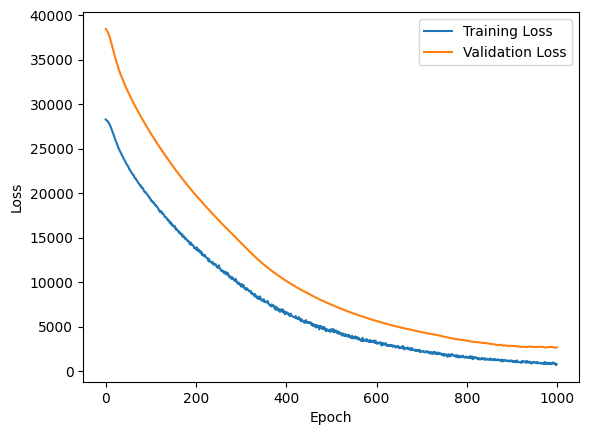

In [239]:
import matplotlib.pyplot as plt

plt.plot(history_qb.history['loss'], label='Training Loss')
plt.plot(history_qb.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



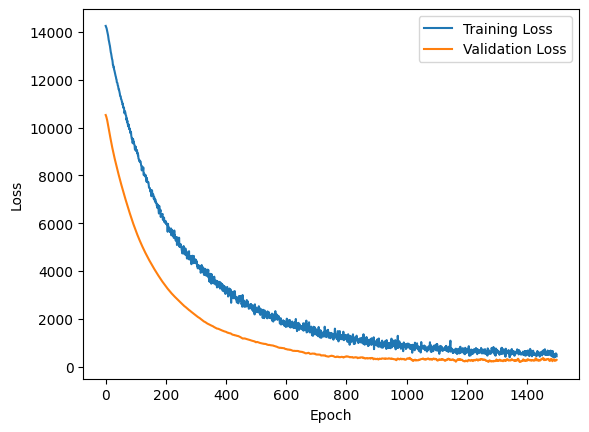

In [269]:
plt.plot(history_wrte.history['loss'], label='Training Loss')
plt.plot(history_wrte.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

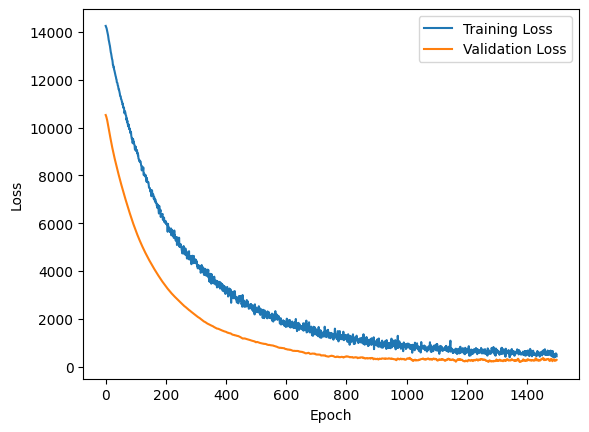

In [270]:
plt.plot(history_rb.history['loss'], label='Training Loss')
plt.plot(history_rb.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()